# **Deep Learning Frameworks** - PRACTICAL

In [3]:
##Q1: How do you install and verify that TensorFlow 2.0 was installed successfully?


!pip install tensorflow

In [4]:
## Verification
import tensorflow as tf
print(tf.__version__)

2.17.1


In [6]:
##Q2: How can you define a simple function in TensorFlow 2.0 to perform addition?

def add(x,y):
  return x+y
a=tf.constant(2)
b=tf.constant(4)
result=add(a,b)
print(result)

tf.Tensor(6, shape=(), dtype=int32)


In [13]:
##How can you create a simple neural network in TensorFlow 2.0 with one hidden layer?
import tensorflow.keras as keras
from keras.layers import Dense,Flatten,Conv2D
from keras import Sequential
model=Sequential()
model.add(Dense(10, activation='relu', input_shape=(5,)))
model.add(Dense(1,activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
##How can you visualize the training progress using TensorFlow and Matplotlib?
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

xtr=x_train.reshape(-1,28,28,1).astype('float32')/255.0
xts=x_test.reshape(-1,28,28,1).astype('float32')/255.0

# define the model
model=Sequential([Flatten(input_shape=(28,28)),
                  Dense(512,activation='relu'),
                  Dense(10,activation='softmax')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(xtr,y_train,epochs=10,validation_data=(x_test,y_test))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9014 - loss: 0.3389 - val_accuracy: 0.9696 - val_loss: 13.6115
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9753 - loss: 0.0816 - val_accuracy: 0.9758 - val_loss: 10.3614
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9844 - loss: 0.0503 - val_accuracy: 0.9789 - val_loss: 10.6635
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9903 - loss: 0.0319 - val_accuracy: 0.9781 - val_loss: 12.5714
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9931 - loss: 0.0224 - val_accuracy: 0.9778 - val_loss: 14.6121
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9794 - val_loss: 13.7735
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9813 - val_loss: 15.6122
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9961 - 

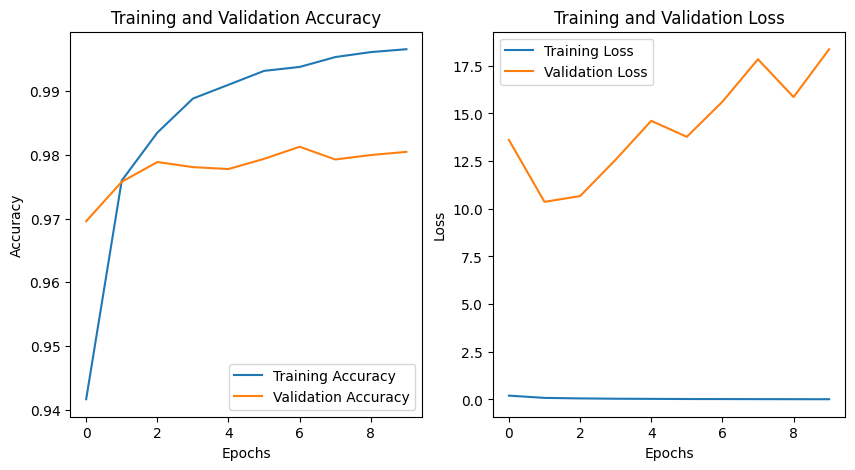

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



In [43]:
## Q5: How do you install PyTorch and verify the PyTorch installation?

!pip install torch torchvision torchaudio

In [1]:
import torch
print(torch.__version__)

2.5.1+cu121


In [2]:
##Q6: How do you create a simple neural network in PyTorch?

import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Create an instance of the model
model = NeuralNet(input_size=784, hidden_size=500, output_size=10)

In [3]:
## How do you define a loss function and optimizer in PyTorch2

import torch.optim as optim

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [5]:
## Q8: How do you implement a custom loss function in PyTorch?

import torch
import torch.nn as nn

class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target):
        """
        Custom loss calculation: Mean Absolute Error (MAE)
        Args:
            output: Predicted tensor from the model
            target: Ground truth tensor
        Returns:
            loss: Calculated loss value
        """
        # Calculate the absolute difference between output and target
        loss = torch.mean(torch.abs(output - target))  # Mean Absolute Error
        return loss

# Example usage
if __name__ == "__main__":
    # Create an instance of the custom loss
    custom_loss = CustomLoss()

    # Example data
    output = torch.tensor([2.5, 0.0, 2.1, 7.5], requires_grad=True)  # Predicted values
    target = torch.tensor([3.0, -0.5, 2.0, 7.0])  # Ground truth values

    # Compute loss
    loss_value = custom_loss(output, target)

    # Print the loss
    print(f"Calculated Loss: {loss_value.item()}")


Calculated Loss: 0.3999999761581421


In [7]:
# ## Q9: How do you save and load a TensorFlow model?
##Save
model.save('my_model.h5')

##Loading
loaded_model = tf.keras.models.load_model('my_model.h5')